### wordnet
https://www.nltk.org/howto/wordnet.html

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


True

In [10]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
from nltk.corpus import wordnet

In [13]:
synsets=wordnet.synsets("plan")
synsets

[Synset('plan.n.01'),
 Synset('design.n.02'),
 Synset('plan.n.03'),
 Synset('plan.v.01'),
 Synset('plan.v.02'),
 Synset('plan.v.03'),
 Synset('design.v.04')]

In [14]:
plan=wordnet.synset("plan.n.01")
plan

Synset('plan.n.01')

In [15]:
plan.definition()

'a series of steps to be carried out or goals to be accomplished'

In [16]:
planv=wordnet.synset("plan.v.01")
planv

Synset('plan.v.01')

In [17]:
planv.definition()

'have the will and intention to carry out some action'

In [18]:
#boy man 유사한 단어
wordnet.synsets("boy")

[Synset('male_child.n.01'),
 Synset('boy.n.02'),
 Synset('son.n.01'),
 Synset('boy.n.04')]

In [19]:
wordnet.synsets("boy.n.02")
wordnet.synsets("man")

[Synset('man.n.01'),
 Synset('serviceman.n.01'),
 Synset('man.n.03'),
 Synset('homo.n.02'),
 Synset('man.n.05'),
 Synset('man.n.06'),
 Synset('valet.n.01'),
 Synset('man.n.08'),
 Synset('man.n.09'),
 Synset('man.n.10'),
 Synset('world.n.08'),
 Synset('man.v.01'),
 Synset('man.v.02')]

In [20]:
boy=wordnet.synset("boy.n.02")
man=wordnet.synset("man.n.01")

In [21]:
boy

Synset('boy.n.02')

In [22]:
man

Synset('man.n.01')

In [23]:
boy.path_similarity(man)

0.5

In [24]:
# car단어에 5개의 동의어 그룹이 있음
wordnet.synsets("car")

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [25]:
wordnet.synsets("car")[0]

Synset('car.n.01')

In [26]:
car=wordnet.synset('car.n.01')
car.definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

### 표제어 따른 동의어

In [27]:
car.lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [28]:
computer=wordnet.synset('computer.n.01')
computer.definition()

'a machine for performing calculations automatically'

In [29]:
computer.lemma_names()

['computer',
 'computing_machine',
 'computing_device',
 'data_processor',
 'electronic_computer',
 'information_processing_system']

In [30]:
johnson=wordnet.synset('johnson.n.01')
johnson.definition()

'English writer and lexicographer (1709-1784)'

In [31]:
johnson.lemma_names()

['Johnson', 'Samuel_Johnson', 'Dr._Johnson']

In [32]:
"""
TF-IDF기반 영화 추천 시스템
실행과정 : 
즐겁게 봤던 영화 제목을 입력하세요? Toy Story
당신에게 추천하고 싶은 영화 제목은 아래과 같습니다
1) 
2)
...
10)

개발 방법
1)overview 열 추출 -> 단어 전처리(불용어 제거, 대소문자, 단어 통일(wordnet), 특수문자 처리, 정규식이용)-> 코퍼스
    - 즉 최대한 불필요한 단어 삭제
2) tf-idf 행렬 생성
3) 코사인유사도를 이용한 영화 추천
4) 데이터셋
- 5000편 영화

5) 카페 제출
"""

data=pd.read_csv("archive (1)/movies_metadata.csv")
data

C:\Users\user\AppData\Local\Temp\ipykernel_22040\1422193472.py:22: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("archive (1)/movies_metadata.csv")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [33]:
data.shape

(45466, 24)

### 데이터가 방대해서 5000건으로 사용

In [34]:
data=data.head(5000)
data

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",NaN,43715,tt0050294,en,The Deadly Mantis,The calving of an Arctic iceberg releases a gi...,...,1957-05-01,0.0,79.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,This Was the Day That Engulfed the World in Te...,The Deadly Mantis,False,5.3,16.0
4996,False,NaN,60000000,"[{'id': 18, 'name': 'Drama'}]",NaN,10052,tt0259288,en,Dragonfly,A grieving doctor is being contacted by his la...,...,2002-02-22,52322400.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,When someone you love dies... are they gone fo...,Dragonfly,False,6.2,209.0
4997,False,"{'id': 217704, 'name': 'The Vampire Chronicles...",35000000,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...",NaN,11979,tt0238546,en,Queen of the Damned,Lestat de Lioncourt is awakened from his slumb...,...,2002-02-10,45479110.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,This time there are no interviews.,Queen of the Damned,False,5.5,247.0
4998,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,75151,tt0260746,en,Big Bad Love,Vietnam veteran Leon Barlow is struggling as a...,...,2001-10-11,0.0,111.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Big Bad Love,False,6.5,4.0


### column를 통해서 알 수 있듯이 모든 열을 사용해서 모델링을 할 수 없다

In [35]:
data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

### 열값이 많아서 7개로 축약

In [36]:
data = data[['id','genres', 'vote_average', 'vote_count','popularity','title', 'overview']]

In [37]:
data

,id,genres,vote_average,vote_count,popularity,title,overview
0,862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",7.7,5415.0,21.946943,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",6.9,2413.0,17.015539,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",6.5,92.0,11.7129,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",6.1,34.0,3.859495,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,"[{'id': 35, 'name': 'Comedy'}]",5.7,173.0,8.387519,Father of the Bride Part II,Just when George Banks has recovered from his ...
...,...,...,...,...,...,...,...
4995,43715,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",5.3,16.0,1.738062,The Deadly Mantis,The calving of an Arctic iceberg releases a gi...
4996,10052,"[{'id': 18, 'name': 'Drama'}]",6.2,209.0,4.924078,Dragonfly,A grieving doctor is being contacted by his la...
4997,11979,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...",5.5,247.0,8.436243,Queen of the Damned,Lestat de Lioncourt is awakened from his slumb...
4998,75151,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",6.5,4.0,0.437438,Big Bad Love,Vietnam veteran Leon Barlow is struggling as a...


### 0.9는 90% 지점을 말하는 것 

In [38]:
data["vote_count"].quantile(0.9)

568.1000000000004

### vote_count가 너무 낮은것은 의미가 없다고 생각해라

In [39]:
data["vote_count"].describe()

count    5000.000000
mean      246.124400
std       656.685835
min         0.000000
25%        13.000000
50%        49.000000
75%       184.000000
max      9678.000000
Name: vote_count, dtype: float64

In [40]:
tmp=data["vote_count"].quantile(0.9) #568
data=data[data["vote_count"]>tmp]

In [41]:
data["vote_count"].describe()

count     500.000000
mean     1638.622000
std      1424.593369
min       569.000000
25%       791.500000
50%      1096.000000
75%      1769.500000
max      9678.000000
Name: vote_count, dtype: float64

In [42]:
data

,id,genres,vote_average,vote_count,popularity,title,overview
0,862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",7.7,5415.0,21.946943,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",6.9,2413.0,17.015539,Jumanji,When siblings Judy and Peter discover an encha...
5,949,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",7.7,1886.0,17.924927,Heat,"Obsessive master thief, Neil McCauley leads a ..."
9,710,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",6.6,1194.0,14.686036,GoldenEye,James Bond must unmask the mysterious head of ...
15,524,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",7.8,1343.0,10.137389,Casino,The life of the gambling paradise – Las Vegas ...
...,...,...,...,...,...,...,...
4863,120,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8.0,8892.0,32.070725,The Lord of the Rings: The Fellowship of the Ring,"Young hobbit Frodo Baggins, after inheriting a..."
4865,453,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",7.7,3087.0,11.93646,A Beautiful Mind,"At Princeton University, John Nash struggles t..."
4880,855,"[{'id': 28, 'name': 'Action'}, {'id': 36, 'nam...",7.2,1832.0,10.064446,Black Hawk Down,When U.S. Rangers and an elite Delta Force tea...
4936,10229,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",7.5,1057.0,8.054499,A Walk to Remember,"When the popular, restless Landon Carter is fo..."


In [43]:
C = data['vote_average'].mean()
C

7.036200000000001

In [44]:
m=tmp
m

568.1000000000004

In [45]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    
    return ( v / (v+m) * R ) + (m / (m + v) * C)

https://www.quora.com/How-does-IMDbs-rating-system-work
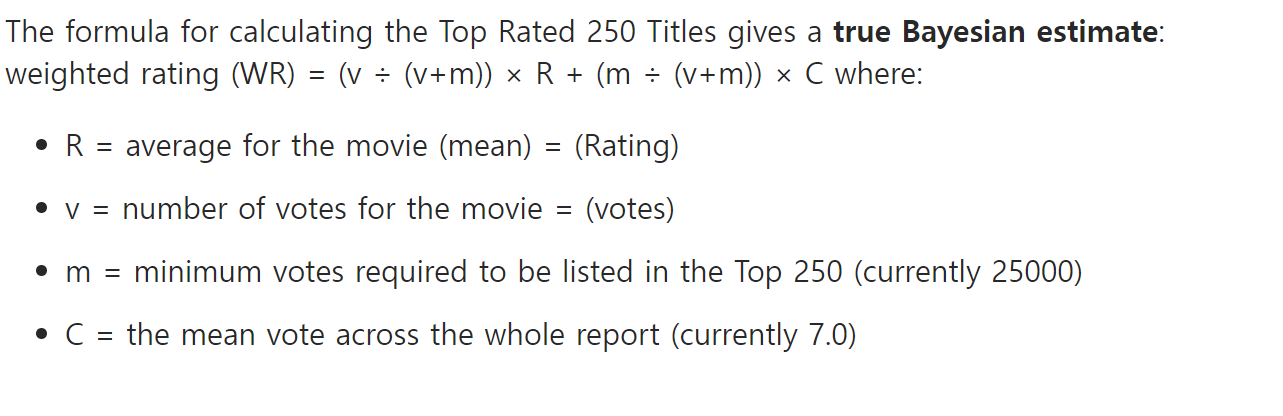

In [46]:
data['score'] = data.apply(weighted_rating, axis = 1)

C:\Users\user\AppData\Local\Temp\ipykernel_22040\155826747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['score'] = data.apply(weighted_rating, axis = 1)


In [47]:
data

,id,genres,vote_average,vote_count,popularity,title,overview,score
0,862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",7.7,5415.0,21.946943,Toy Story,"Led by Woody, Andy's toys live happily in his ...",7.636972
1,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",6.9,2413.0,17.015539,Jumanji,When siblings Judy and Peter discover an encha...,6.925955
5,949,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",7.7,1886.0,17.924927,Heat,"Obsessive master thief, Neil McCauley leads a ...",7.546337
9,710,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",6.6,1194.0,14.686036,GoldenEye,James Bond must unmask the mysterious head of ...,6.740631
15,524,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",7.8,1343.0,10.137389,Casino,The life of the gambling paradise – Las Vegas ...,7.572950
...,...,...,...,...,...,...,...,...
4863,120,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8.0,8892.0,32.070725,The Lord of the Rings: The Fellowship of the Ring,"Young hobbit Frodo Baggins, after inheriting a...",7.942122
4865,453,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",7.7,3087.0,11.93646,A Beautiful Mind,"At Princeton University, John Nash struggles t...",7.596828
4880,855,"[{'id': 28, 'name': 'Action'}, {'id': 36, 'nam...",7.2,1832.0,10.064446,Black Hawk Down,When U.S. Rangers and an elite Delta Force tea...,7.161229
4936,10229,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",7.5,1057.0,8.054499,A Walk to Remember,"When the popular, restless Landon Carter is fo...",7.337865


In [48]:
data["genres"]

0       [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1       [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
5       [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
9       [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...
15      [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...
                              ...                        
4863    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
4865    [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...
4880    [{'id': 28, 'name': 'Action'}, {'id': 36, 'nam...
4936    [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...
4977    [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...
Name: genres, Length: 500, dtype: object

In [49]:
data["genres"].loc[0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [50]:
type(data["genres"].loc[0])

str

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"
- 리스트가 아닌 문자열이다

# eval

In [51]:
#장르열에 이렇게 입력되기를 원하는 경우
#data["genres"]="Animation","Comedy","Family"

In [52]:
1+2
"1+2"
eval("1+2")

3

# eval을 통해 문자열에서 리스트로 바꿔줌

In [53]:
type(eval(data["genres"].loc[0]))

list

In [54]:
eval(data["genres"].loc[0])

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [55]:
type(eval(data["genres"].loc[0]))

list

In [56]:
eval(data["genres"].loc[0])[0]["name"]
eval(data["genres"].loc[0])[1]["name"]
eval(data["genres"].loc[0])[2]["name"]

'Family'

# 장르명만 추출해서 리스트구조로 바꿔주기

In [57]:
eval(data["genres"].loc[0])

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [58]:
"""
lst = []
for i in range(len(data['genres'])) :
    st= ''
    for j in range(len(eval(data['genres'].iloc[i]))) :
        st += eval(data['genres'].iloc[i])[j]['name'] + ' '
    lst.append(st)
    
lst = []
for i in range(len(data['genres'])) :
    st= ''
    for j in range(len(eval(data['genres'].iloc[i]))) :
        st += eval(data['genres'].iloc[i])[j]['name'] + ' '
    lst.append(st)
    
data['genres'].apply(lambda x: ' '.join([i.get('name') for i in eval(x)]))   

data['genres'].apply(lambda x: " ".join([i['name'] for i in x]))

data['genres'].apply(lambda x: [x[i]['name'] for i in range(len(x))])
"""

'\nlst = []\nfor i in range(len(data[\'genres\'])) :\n    st= \'\'\n    for j in range(len(eval(data[\'genres\'].iloc[i]))) :\n        st += eval(data[\'genres\'].iloc[i])[j][\'name\'] + \' \'\n    lst.append(st)\n    \nlst = []\nfor i in range(len(data[\'genres\'])) :\n    st= \'\'\n    for j in range(len(eval(data[\'genres\'].iloc[i]))) :\n        st += eval(data[\'genres\'].iloc[i])[j][\'name\'] + \' \'\n    lst.append(st)\n    \ndata[\'genres\'].apply(lambda x: \' \'.join([i.get(\'name\') for i in eval(x)]))   \n\ndata[\'genres\'].apply(lambda x: " ".join([i[\'name\'] for i in x]))\n\ndata[\'genres\'].apply(lambda x: [x[i][\'name\'] for i in range(len(x))])\n'

In [59]:
data["genres"]=data['genres'].apply(eval)

C:\Users\user\AppData\Local\Temp\ipykernel_22040\780366431.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["genres"]=data['genres'].apply(eval)


In [60]:
data['genres'].apply(lambda x: [d['name'] for d in x]  )

data['genres'].apply(lambda x: [d['name'] for d in x]).apply(lambda x : " ".join(x))

0           Animation Comedy Family
1          Adventure Fantasy Family
5       Action Crime Drama Thriller
9         Adventure Action Thriller
15                      Drama Crime
                   ...             
4863       Adventure Fantasy Action
4865                  Drama Romance
4880             Action History War
4936                  Drama Romance
4977           Drama Thriller Crime
Name: genres, Length: 500, dtype: object

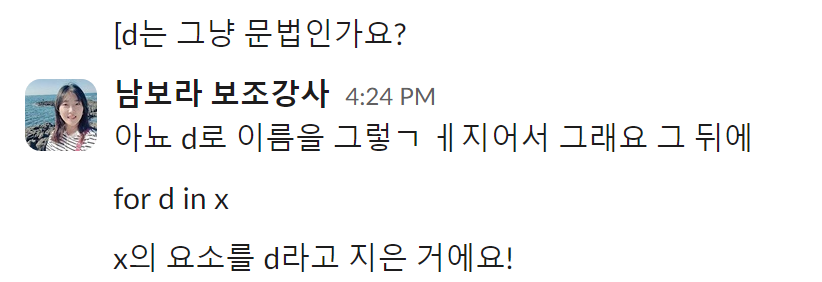

In [61]:
data["genres"]=data['genres'].apply(lambda x: [d['name'] for d in x]).apply(lambda x : " ".join(x))

C:\Users\user\AppData\Local\Temp\ipykernel_22040\1306055511.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["genres"]=data['genres'].apply(lambda x: [d['name'] for d in x]).apply(lambda x : " ".join(x))


In [62]:
data

,id,genres,vote_average,vote_count,popularity,title,overview,score
0,862,Animation Comedy Family,7.7,5415.0,21.946943,Toy Story,"Led by Woody, Andy's toys live happily in his ...",7.636972
1,8844,Adventure Fantasy Family,6.9,2413.0,17.015539,Jumanji,When siblings Judy and Peter discover an encha...,6.925955
5,949,Action Crime Drama Thriller,7.7,1886.0,17.924927,Heat,"Obsessive master thief, Neil McCauley leads a ...",7.546337
9,710,Adventure Action Thriller,6.6,1194.0,14.686036,GoldenEye,James Bond must unmask the mysterious head of ...,6.740631
15,524,Drama Crime,7.8,1343.0,10.137389,Casino,The life of the gambling paradise – Las Vegas ...,7.572950
...,...,...,...,...,...,...,...,...
4863,120,Adventure Fantasy Action,8.0,8892.0,32.070725,The Lord of the Rings: The Fellowship of the Ring,"Young hobbit Frodo Baggins, after inheriting a...",7.942122
4865,453,Drama Romance,7.7,3087.0,11.93646,A Beautiful Mind,"At Princeton University, John Nash struggles t...",7.596828
4880,855,Action History War,7.2,1832.0,10.064446,Black Hawk Down,When U.S. Rangers and an elite Delta Force tea...,7.161229
4936,10229,Drama Romance,7.5,1057.0,8.054499,A Walk to Remember,"When the popular, restless Landon Carter is fo...",7.337865


In [63]:
tfidf=TfidfVectorizer()

### fit_transform : fit과 transform을 동시에 함

In [64]:
tfidf_mat=tfidf.fit_transform(data["genres"])

In [65]:
tfidf_mat #sparse matrix(희소행렬) : 요소값이 대두분 0인 행렬 <---(반의어)---> Dense matrix(밀집행렬)

<500x18 sparse matrix of type '<class 'numpy.float64'>'
	with 1480 stored elements in Compressed Sparse Row format>

>- <500x18 sparse matrix of type '<class 'numpy.float64'>'
	- with 1480 stored elements in Compressed Sparse Row format>
- 9000개중 1480개가 0이 아니다라는 뜻

In [66]:
tfidf_mat.get_shape

<bound method spmatrix.get_shape of <500x18 sparse matrix of type '<class 'numpy.float64'>'
	with 1480 stored elements in Compressed Sparse Row format>>

In [67]:
tfidf_mat.toarray()

array([[0.        , 0.        , 0.68446074, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.49643844, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.49221759, 0.        , 0.        , ..., 0.49221759, 0.        ,
        0.        ],
       ...,
       [0.36719214, 0.        , 0.        , ..., 0.        , 0.6472816 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.56546043, 0.        ,
        0.        ]])

In [68]:
tfidf_mat.toarray()[1]

array([0.        , 0.49643844, 0.        , 0.        , 0.        ,
       0.        , 0.60687195, 0.62068938, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

array([0.        , 0.49643844, 0.        , 0.        , 0.        ,
       0.        , 0.60687195, 0.62068938, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])
       - 여기서 번호가 큰것은 중요하다는 말, 가장 대표할 수 있는 장르다

In [69]:
tfidf_mat.toarray()[499]

array([0.        , 0.        , 0.        , 0.        , 0.66922507,
       0.48207085, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.56546043, 0.        , 0.        ])

In [70]:
tfidf_mat.getcol(0)

<500x1 sparse matrix of type '<class 'numpy.float64'>'
	with 140 stored elements in Compressed Sparse Row format>

In [71]:
tfidf.vocabulary_

{'animation': 2,
 'comedy': 3,
 'family': 6,
 'adventure': 1,
 'fantasy': 7,
 'action': 0,
 'crime': 4,
 'drama': 5,
 'thriller': 15,
 'science': 14,
 'fiction': 8,
 'mystery': 12,
 'romance': 13,
 'horror': 10,
 'history': 9,
 'war': 16,
 'western': 17,
 'music': 11}

In [72]:
tfidf.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_mat.toarray(), columns=tfidf.get_feature_names_out())

In [73]:
cosine_similarity(tfidf_df)[0]

array([1.        , 0.3541364 , 0.        , 0.        , 0.        ,
       0.22443568, 0.        , 0.51965981, 0.22892439, 0.        ,
       0.73997229, 0.        , 0.        , 0.        , 0.4370241 ,
       0.        , 0.        , 0.19780967, 0.        , 0.        ,
       0.56412632, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.4370241 , 0.4370241 , 0.18457278, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.23310648, 0.        ,
       0.22892439, 0.22892439, 0.82251485, 0.17441201, 0.        ,
       0.        , 0.        , 0.        , 0.32310383, 0.        ,
       0.        , 0.        , 0.46026541, 0.63989718, 0.        ,
       0.4370241 , 0.        , 0.22892439, 0.        , 0.7494637 ,
       0.        , 0.        , 0.72904972, 0.        , 0.71968376,
       0.        , 0.        , 0.        , 0.        , 0.7494637 ,
       0.53732606, 0.8994498 , 0.26047833, 0.        , 0.90245

In [74]:
hightest_10=cosine_similarity(tfidf_df)[0].argsort()[:10]
for i in hightest_10:
    x =data["title"].iloc[i]
    print(x)

John Q
A Walk to Remember
Rain Man
Rocky
Pi
Armageddon
Cast Away
Godzilla
Deep Impact
The Man in the Iron Mask


In [75]:
hightest_10

array([499, 498, 248, 247, 245, 243, 443, 239, 238, 237], dtype=int64)

In [76]:
(cosine_similarity(tfidf_df)[0].max())

1.0000000000000002

In [77]:
cosine_similarity(tfidf_df)[0].argsort()[:10]
    

array([499, 498, 248, 247, 245, 243, 443, 239, 238, 237], dtype=int64)